In [2]:
from pygsp import graphs, filters
import numpy as np  
import matplotlib.pyplot as plt
import networkx as nx


In [3]:
rs = np.random.RandomState(42)

In [4]:
n = 25
D = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i==j:
            D[i,j] = rs.randint(1, 10)

A = np.zeros((n,n))
for i in range(n):
    degree = int(D[i,i])
    links_created = 0
    while links_created < degree:
        link = rs.randint(0, n)
        if link != i and A[i, link] == 0:
            A[i, link] = 1
            links_created += 1
L = D - A
GL = graphs.Graph(L)


2025-01-01 23:37:30,244:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


In [5]:
def plot_matrices(D, A, L,annot=True):   
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    ax[0].imshow(D, cmap='coolwarm')
    for (i, j), val in np.ndenumerate(D):
        if i == j and val > 0:
            if annot:
                ax[0].text(j, i, int(val), ha='center', va='center', color='white')
        elif i != j:
            ax[0].images[0].get_array()[i, j] = np.nan
    ax[0].set_title('Matrix Diagonal')
    fig.colorbar(ax[0].images[0], ax=ax[0])

    ax[1].imshow(A, cmap='Greys')
    for (i, j), val in np.ndenumerate(A):
        if val > 0:
            if annot:
                ax[1].text(j, i, int(val), ha='center', va='center', color='white')
                ax[1].text(j, j, 0, ha='center', va='center', color='black')
    ax[1].set_title('Matrix Adjacency')
    fig.colorbar(ax[1].images[0], ax=ax[1])

    ax[2].imshow(L, cmap='viridis')
    for (i, j), val in np.ndenumerate(L):
        if i == j:
            if annot:
                ax[2].text(j, i, int(val), ha='center', va='center', color='white')
        elif val == 0:
            ax[2].images[0].get_array()[i, j] = np.nan
            if annot:
                ax[2].text(j, i, int(val), ha='center', va='center', color='white')
        elif val == -1:
            if annot:
                ax[2].text(j, i, int(val), ha='center', va='center', color='black')

    ax[2].set_title('Laplacian Matrix')
    fig.colorbar(ax[2].images[0], ax=ax[2])

    plt.show()

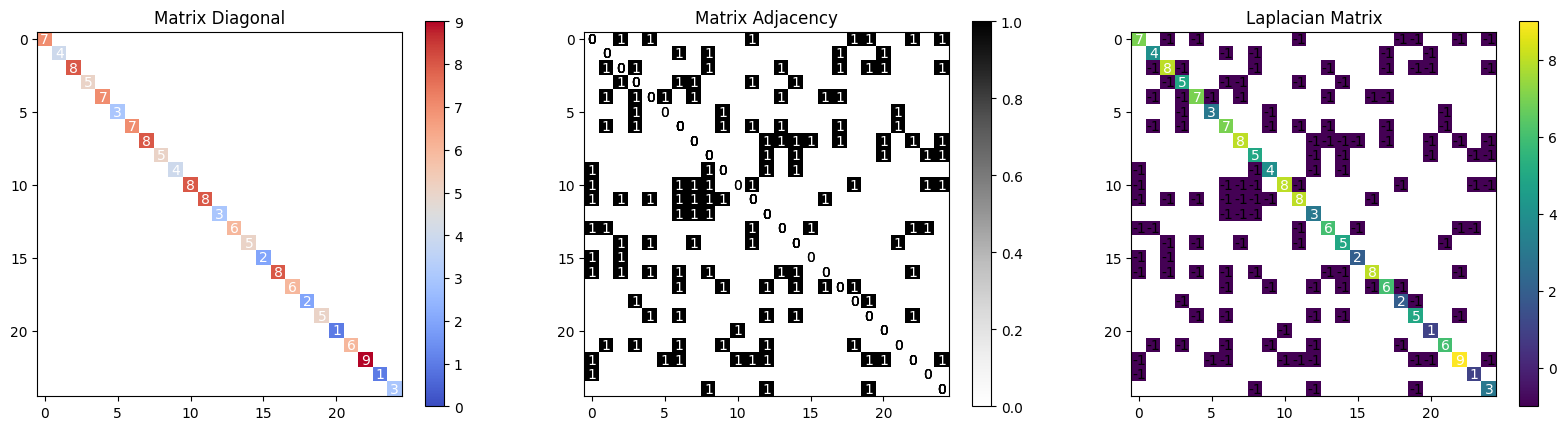

2025-01-01 23:37:32,326:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


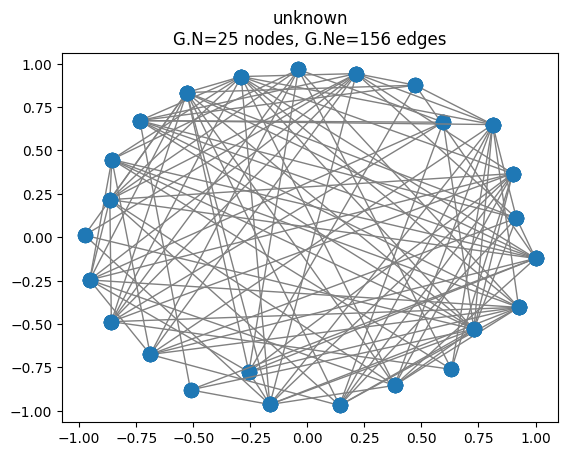

In [6]:
plot_matrices(D, A, L)
GL.set_coordinates()
GL.plot()


In [7]:
n = 10
D_b = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i==j:
            degree = n-i-1
            D_b[i,j] = degree

A_b = np.zeros((n,n))
for i in range(n):
    degree = int(D_b[i,i])
    links_created = 0
    while links_created < degree:
        link = rs.randint(0, n)
        if link != i and A_b[i, link] == 0:
            A_b[i, link] = 1
            links_created += 1

L_b = D_b - A_b
GL_b = graphs.Graph(L_b)


2025-01-01 23:37:32,898:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


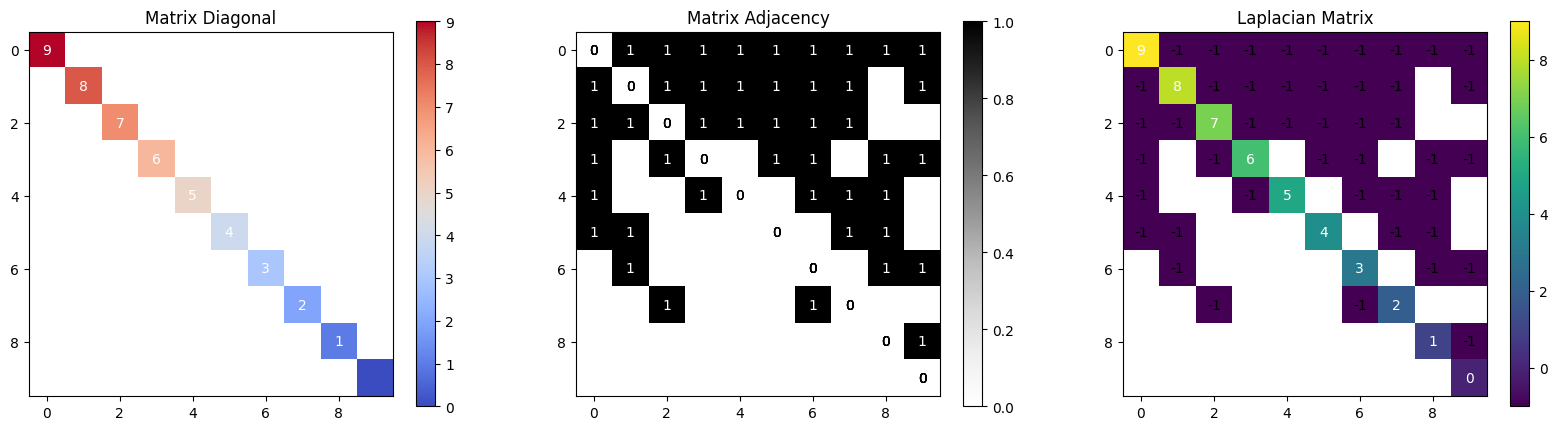

2025-01-01 23:37:33,809:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


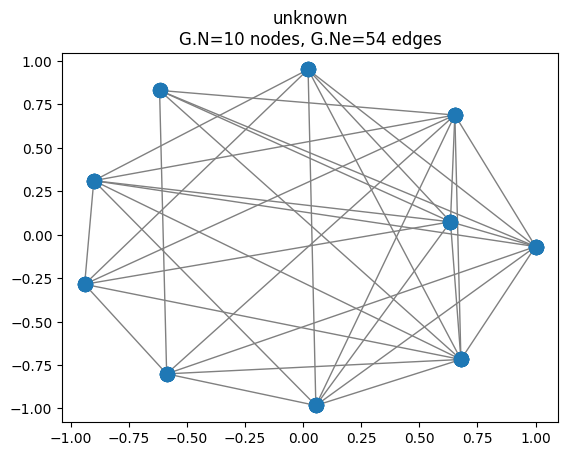

In [8]:
plot_matrices(D_b, A_b, L_b)
GL_b.set_coordinates()
GL_b.plot()

2025-01-01 23:37:34,108:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


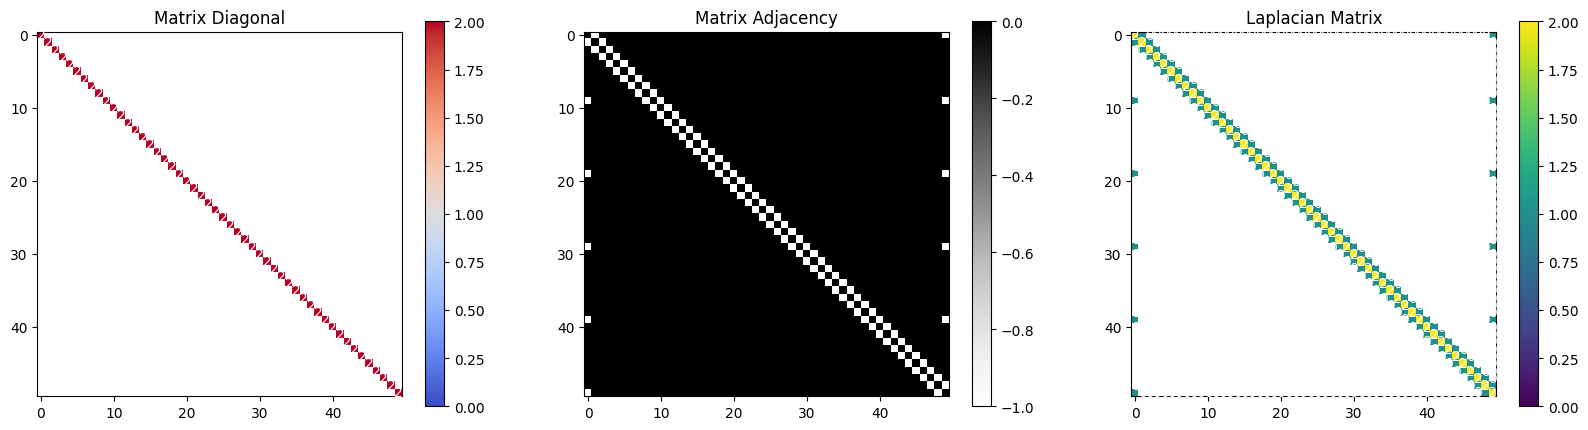

2025-01-01 23:37:37,134:[WARNING](pygsp.graphs.graph.check_weights): The main diagonal of the weight matrix is not 0!


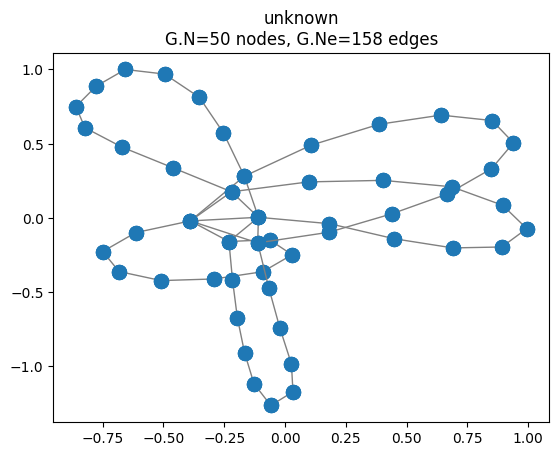

In [9]:
n = 50
D_b = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i==j:
            degree = 2
            D_b[i,j] = degree

A_b = np.zeros((n,n))
for i in range(n):
    degree = int(D_b[i,i])
    if i == 0:
        A_b[i,i+1] = -1
        A_b[i,n-1] = -1
    if i == 9:
        A_b[i,0] = -1
        A_b[i,n-1] = -1
    if i == 19:
        A_b[i,0] = -1
        A_b[i,n-1] = -1
    if i == 29:
        A_b[i,0] = -1
        A_b[i,n-1] = -1
    if i == 39:
        A_b[i,0] = -1
        A_b[i,n-1] = -1

    if i == n-1:
        A_b[i,i-1] = -1
        A_b[i,0] = -1
        continue
    if (i >= 1):
        if i<n:
            A_b[i,i-1] = -1
            A_b[i,i+1] = -1
L_b = D_b - A_b
GL_b = graphs.Graph(L_b)
plot_matrices(D_b, A_b, L_b)
GL_b.set_coordinates()
GL_b.plot()

Pairwise Distance Matrix:
[[0. 1. 2. ... 3. 2. 1.]
 [1. 0. 1. ... 4. 3. 2.]
 [2. 1. 0. ... 5. 4. 3.]
 ...
 [3. 4. 5. ... 0. 1. 2.]
 [2. 3. 4. ... 1. 0. 1.]
 [1. 2. 3. ... 2. 1. 0.]]


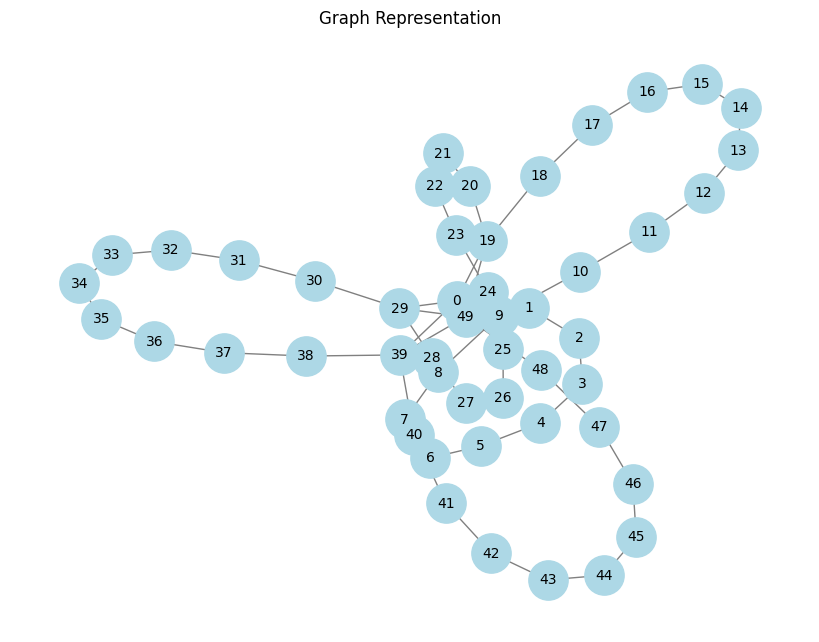

In [10]:
##TODO: compue actual G distance matrix
G = nx.Graph()
for i in range(n):
    for j in range(n):
        if A_b[i, j] != 0:  # If there's a connection
            G.add_edge(i, j)
# Calculate pairwise shortest paths
distances = dict(nx.all_pairs_shortest_path_length(G))

# Display the distances in matrix form
distance_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distance_matrix[i, j] = distances[i][j]

print("Pairwise Distance Matrix:")
print(distance_matrix)

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800, font_size=10)
plt.title("Graph Representation")
plt.show()

In [11]:
np.savetxt("dtm.txt",distance_matrix, fmt='%.6f', delimiter=',')

In [12]:
node_coordinates_sp = nx.spectral_layout(G)
node_coordinates_c = nx.circular_layout(G)

# Convert the node coordinates to a 2D numpy array
coordinates_sp = np.array([node_coordinates_sp[i] for i in range(n)])
coordinates_c = np.array([node_coordinates_c[i] for i in range(n)])


# Save the coordinates to a file
"""np.savetxt("50spectral_layout.txt", coordinates_sp, fmt='%.6f', delimiter=',')
np.savetxt("50circular_layout.txt", coordinates_c, fmt='%.6f', delimiter=',')"""

'np.savetxt("50spectral_layout.txt", coordinates_sp, fmt=\'%.6f\', delimiter=\',\')\nnp.savetxt("50circular_layout.txt", coordinates_c, fmt=\'%.6f\', delimiter=\',\')'

In [13]:
"""# Save the distance matrix to a .txt file
np.savetxt("50distance_matrix.txt", distance_matrix, fmt='%d', delimiter=',')
np.savetxt("50node_coordinate_circle.txt", coordinates_c, fmt='%.6f', delimiter=',')
np.savetxt("50node_coordinate_spring.txt", coordinates_s, fmt='%.6f', delimiter=',')
np.savetxt("50node_coordinate_kk.txt", coordinates_k, fmt='%.6f', delimiter=',')"""

'# Save the distance matrix to a .txt file\nnp.savetxt("50distance_matrix.txt", distance_matrix, fmt=\'%d\', delimiter=\',\')\nnp.savetxt("50node_coordinate_circle.txt", coordinates_c, fmt=\'%.6f\', delimiter=\',\')\nnp.savetxt("50node_coordinate_spring.txt", coordinates_s, fmt=\'%.6f\', delimiter=\',\')\nnp.savetxt("50node_coordinate_kk.txt", coordinates_k, fmt=\'%.6f\', delimiter=\',\')'